# Objetivos

En este colab vamos a comenzar a trabajar con nodos, para ello realizaremos los siguientes ejemplos



1.   Ejemplo 1: simularemos un nodo ya creado para empezar a familiarizarnos con los comandos de ROS 2 y las herramientas de visualización
2.   Ejemplo 2: crearemos un sencillo paquete que contendrá un programa para lanzar un nodo. De este modo comenzaremos a trabajar con los comandos de creación de paquetes, compilación y simulación.

Un consejo: no te conformes sólo con ejecutar las instrucciones que detallamos, es necesario que vayas más lejos, investiga otras opciones y juega con el robot una vez termines la práctica que te proponemos.


# Introducción

La unidad mínima de procesado de un paquete ROS 2 es el Nodo. Cada nodo es responsable de una funcionalidad concreta del robot, por ejemplo el control de las ruedas, la monitorización de un determinado sensor o la activación de un motor. Los nodos los crearemos dentro de programas, en nuestro caso utilizaremos python para crearlos. Un programa python puede contener uno o varios nodos.

ROS 2 posee varios mecanismos que nos permitirán la comunicación entre nodos. El más básico se llama Topic, y no es más que un canal de comunicación que se abre entre varios nodos, de manera que podremos intercambiar mensajes entre ellos.





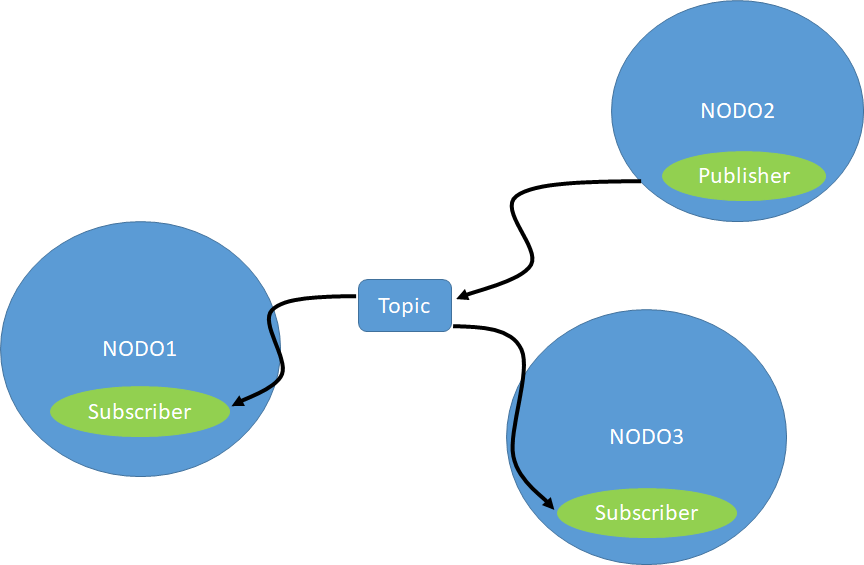

Para comenzar a trabajar con nodos vamos a simular un programa ya implementado y, tras ello, crearemos nuestro primer nodo.




# Ejemplo 1: Simulando el nodo /teleop_keyboard

El nodo **teleop_keyboard**  nos va a permitir mover nuestro robot ya que envía un mensaje a las ruedas del robot informando de la velocidad lineal y angular que queremos que alcancen.

Para poder simular el robot debemos ejecutar en un Terminal [Terminal1] el simulador gazebo, utilizaremos otra ventana [Terminal2] para lanzar algunos comandos que nos permitirán obtener información de los nodos y otra para  ejecutar algunas herramientas de visualización [Terminal3]. Por últimos volveremos a utilizar el terminal 2 para ejecutar el nodo /teleop_keyboard.

Vamos paso a paso.

**Para** ejecutar el simulador gazebo utilizamos el comando


```
ros2 launch <nombre_del_paquete> <fichero_de_lanzamiento>
```

En nuestro caso el paquete es turtlebot3_gazebo y el fichero de lanzamiento del programa a ejecutar es turtlebot3_house.launch.py.
[Terminal1]>

In [ ]:
#[Terminal1]
cd $HOME/turtlebot3_ws
source install/setup.bash #esta orden no hace falta si la habéis incluido en el fichero .bashrc
ros2 launch turtlebot3_gazebo turtlebot3_house.launch.py # Abre el simulador gazebo, carga el robot y el entorno de la casa de turtlebot3

Si observáis que aparece el entorno de simulación (la casa de Turtlebot3) pero no aparece el robot debéis cerrar (Ctrl + X) y volver a lanzarlo. La primera vez que se ejecuta sobre un entorno suele tardar un poco.

Una vez lanzado este programa podemos revisar qué nodos están activos. Para ello abriremos un terminal distinto.

[Terminal2]>

In [ ]:
#[Terminal2]
ros2 node list

Al hacer esto os deberían salir los siguientes nodos:

*   /ros_gz_bridge : nodo del simulador
*   /robot_state_publisher: nodo que controla las transformadas del robot

ROS 2 posee un visualizador gráfico que será muy útil para revisar qué nodos tenemos ejecutándose en un determinado momento. Para ejecutarlo podemos utilizar el terminal 3.

[Terminal3]>

In [ ]:
#[Terminal3]
export ROS_DOMAIN_ID=Xy# aquí tenéis que poner vuestro número de dominio
ros2 run rqt_gui rqt_gui

En el menú ***Plugins*** elegid la opción ***Introspección > Node Graph***.
El resultado os mostrará la siguiente pantalla, en la cual aparecen todos los nodos y se detallan, además, los topics que se utilizan para comunicarse entre los nodos. En este caso sólo tenemos un topic activo (/joint_states). A través de este topic el nodo /turtlebot3_joint_states está publicando el estado de las articulaciones del robot, y el nodo /robot_state_publisber recoge esta información para calcular las transformadas del robot.
Las transformadas son unos vectores que nos dan información de la situación del robot respecto a un sistema de coordenadas determinado.

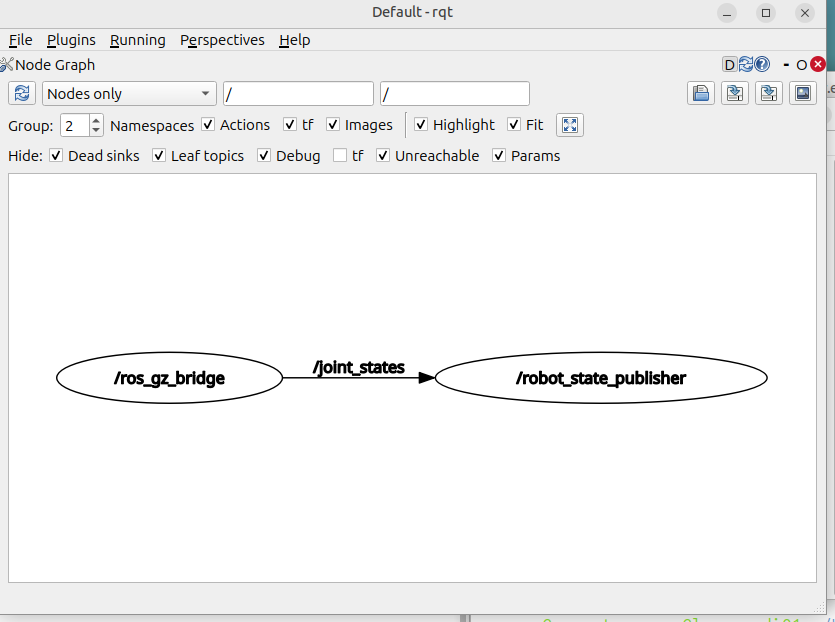

A continuación vamos a ejecutar el nodo /turtlebot3_teleop, que será el que nos permitirá mover el robot. En este caso tenemos que utilizar el comando


```
ros2 run <nombre_del_paquete> <fichero_a_ejecutar>
```



In [ ]:
#[Terminal2]
ros2 run turtlebot3_teleop teleop_keyboard

Aparecerá el siguiente texto:

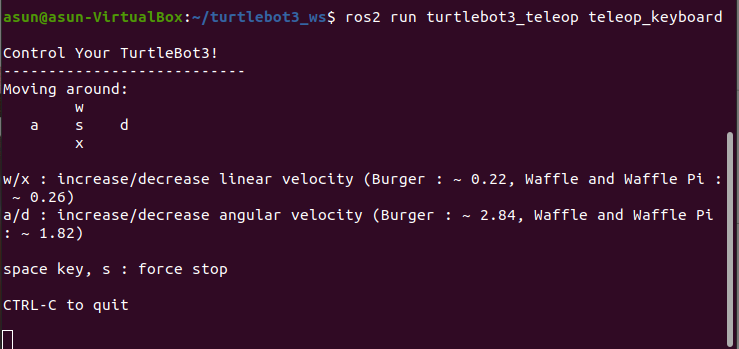

Pulsando algunas de las teclas indicadas podremos mover el robot. ¡¡Atención!!: tenéis que situaros sobre este terminal para que detecte las teclas y mueva el robot.

Con las techas w y x conseguiréis aumentar o disminur la velocidad lineal del robot.

Con las techas a y d conseguiréis aumantar o disminuir la velocidad angular del robot.

Si ahora recargáis el visualizador rqt veréis que aparece un nodo nuevo: /teleop_keyboard. El diagrama muestra el flujo típico al teleoperar el TurtleBot3 en ROS2 Jazzy: el nodo /teleop_keyboard publica comandos de velocidad en /cmd_vel, el nodo /ros_gz_bridge traduce esos mensajes para el simulador y devuelve desde Gazebo el estado de las articulaciones en /joint_states, y finalmente robot_state_publisher usa esos datos para calcular y publicar las transformaciones del robot.

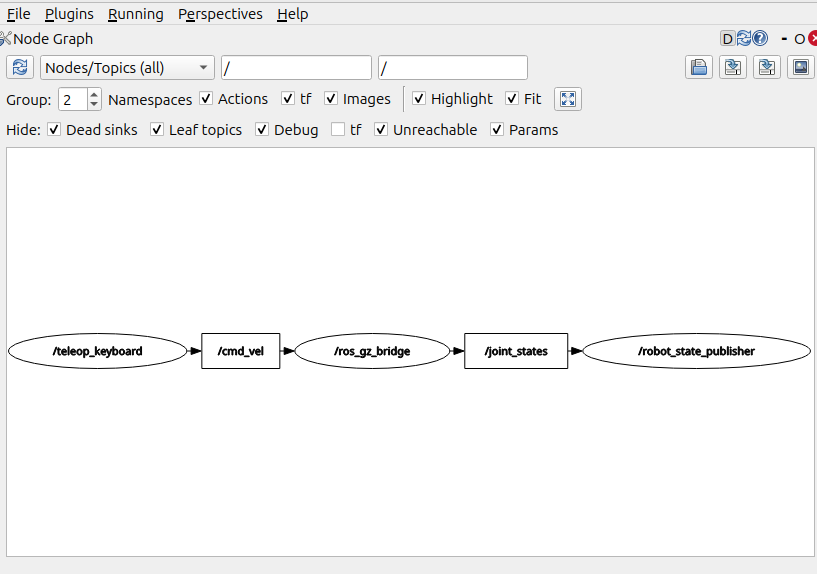

Antes de terminar con este ejemplo es conveniente que navegues por el directorio turtlebot3_ws/src/turtlebot3_simulations/turtlebot3_gazebo y revises la estructura de directorios y ficheros para comenzar a familiarizarte con ella. Puedes editar el fichero turtlebot3_house.launch.py para ver la estructura del mismo.

Si has llegado hasta aquí, ¡enhorabuena! has conseguido ejecutar tu primer programa en ROS 2.

Puedes cerrar los terminales anteriores para continuar con el siguiente ejemplo.

# Ejemplo 2: Creación de un nodo

Vamos a crear nuestro primer nodo. En este caso será un nodo muy sencillo que únicamente se encargará de imprimir el nombre de los integrantes de vuestro equipo de trabajo por pantalla.

El primer paso consiste en crear un paquete, en el directorio turtlebot3_ws/src.
Primero nos situamos en el directorio de trabajo:


```
cd $HOME/turtlebot3_ws/src
```
Y luego crearemos el paquete. Para ello utilizaremos el comando:

```
ros2 pkg create --build-type ament_python <nombre_del_paquete> --dependencies rclpy
```
En el cual estamos indicando que vamos a utilizar el compilador de python y que debe incluir las dependencias del paquete rclpy (que es el que incluye los comandos python para usar los elementos de ROS 2.



In [ ]:
ros2 pkg create --build-type ament_python my_first_node --dependencies rclpy

Comprobad que se ha creado una estructura como la siguiente.

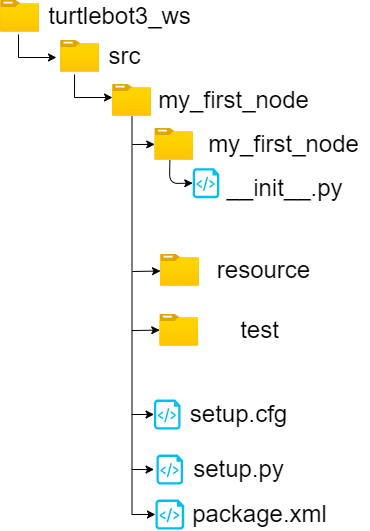

Vamos a crear nuestro primer programa. Para ello copia el siguiente código en un archivo dentro del directorio turtlebot3_ws/src/my_first_node/my_first_node. Llamaremos a ese archivo **simple_node.py**.

In [ ]:
# simple_node.py
import rclpy
# importamos el modulo Node de la librería ROS2 de python
from rclpy.node import Node

#definimos una funcion basica

def main(args=None):
    #inicializamos la comunicacion ROS
    rclpy.init(args=args)
    #creamos un nodo
    my_node = Node('my_node')
    try:
        #imprimimos un mensaje por el terminal
        my_node.get_logger().info('Los miembros de mi equipo son:')
        # Aqui tienes que poner tu propio codigo
        # crea un diccionario con los nombres de los integrantes
        # de tu equipo y luego crea un iterador para ir imprimiendo estos nombres
        # Dejamos abierto el nodo hasta pulsar ctrl+c
        rclpy.spin(my_node)
    except KeyboardInterrupt:
        my_node.get_logger().info('Cerrando el nodo')
    finally:
        #destruimos el nodo
        my_node.destroy_node()
        #cerramos la comunicacion
        rclpy.shutdown()

#definimos el ejecutable
if __name__=='__main__':
  main() # llamada a la funcion



Del código anterior debemos recalcar algunos aspectos:
1. Estamos utilizando la librería rclpy (ROS 2 para python), en concreto importamos el módulo Node que será el que nos permita crear nodos y trabajar con ellos. Podéis encontrar información acerca de la clase Node en la [web de referencia de rclpy](https://docs.ros.org/en/jazzy/p/rclpy/api.html).
2. Utilizamos el método get_logger.info() para imprimir por pantalla los mensajes que queramos a nivel de información.
3. Utilizamos el método spin() para dejar abierto el nodo hasta que el usuario lo mate usando una excepción por teclado (ctrl+c)
4. Definimos qué hacer cuando se produce la excepción anterior (sacar un mensaje por pantalla que lo indique)
5. Para cerrar el programa se ejecutan las funciones que ponemos después de finally

Antes de compilar debemos hacer algunas modificaciones en los ficheros creados dentro del paquete. Primero modificaremos el fichero **setup.py**, en el que añadiremos:
1. La importación de la biblioteca os y del módulo glob
2. En data files: deberemos indicar dónde se van a instalar los ejecutables de los ficheros de lanzamiento
3. En entry_points habrá que incluir el nuevo ejecutable
A continuación se muestra como debería quedar el archivo setup.py.

In [ ]:
# setup.py
from setuptools import setup
# Añadimos la dos lineas siguientes
import os
from glob import glob

package_name = 'my_first_node'

setup(
    name=package_name,
    version='0.0.0',
    packages=[package_name],
    data_files=[
        ('share/ament_index/resource_index/packages',
            ['resource/' + package_name]),
        ('share/' + package_name, ['package.xml']),
        (os.path.join('share', package_name), glob('launch/*.launch.py')) # Añadimos esta linea
    ],
    install_requires=['setuptools'],
    zip_safe=True,
    maintainer='asun',
    maintainer_email='asun@todo.todo',
    description='TODO: Package description',
    license='TODO: License declaration',
    tests_require=['pytest'],
    entry_points={
        'console_scripts': [
          'simple_node = my_first_node.simple_node:main'   # Añadimos esta línea
        ],
    },
)


En segundo lugar generaremos un directorio llamado **launch**, que colgará de turtlebot3_ws/src/my_first_node.


Dentro del directorio launch creamos el fichero del lanzamiento del nodo, y lo llamamos **my_first_node_launch.launch.py**. El fichero contendrá el siguiente código:

In [ ]:
#my_first_node_launch.launch.py
from launch import LaunchDescription
from launch_ros.actions import Node

def generate_launch_description():
    return LaunchDescription([
        Node(
            package='my_first_node',
            executable='simple_node',
            output='screen'),
    ])

A continuación debemos dar permiso de ejecución a los ficheros python creados:

In [ ]:
cd turtlebot3_ws/src/my_first_node/my_first_node
chmod +x simple_node.py
cd turtlebot3_ws/src/my_first_node/launch
chmod +x my_first_node_launch.launch.py

El siguiente paso consiste en compilar el paquete. Para ello debemos **situarnos en el directorio turtlebot3_ws** y ejecutar el siguiente comando:

In [ ]:
cd $HOME/turtlebot3_ws
colcon build

Este comando compila todos los paquetes que cuelgan del directorio de trabajo. Si queremos compilar sólo un determinado paquete tendremos que ejecutar:

In [ ]:
colcon build --packages-select my_first_node

Por último debemos ejecutar el paquete a través de su fichero de lanzamiento (que es el que genera el nodo).

In [ ]:
source install/setup.bash
ros2 launch my_first_node my_first_node_launch.launch.py

Ahora ya sabes como generar tu propio nodo. Este esquema de trabajo lo vamos a repetir mucho durante el curso así que repasa lo que hemos hecho para comprender bien cada paso.

# Conclusión


En este colab hemos aprendido a:


1.   Ejecutar varios programas de ROS 2 utilizando los comandos "*ros2 launch*" y "*ros2 run*"
2.   Visualizar los nodos y topics que se están ejecutando,  utilizando la herramienta *rqt_gui*.
3.   Crear un paquete de ROS 2 utilizando el comando "*ros2 pkg create*"
4.   Trabajar con nodos
5.   Modificar los ficheros *.launch y setup.py para configurarlos correctamente
6.   Compilar un paquete de ROS 2 usando "*colcon build*"